In [1]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.model_selection import train_test_split
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (8,6)
title_size=24

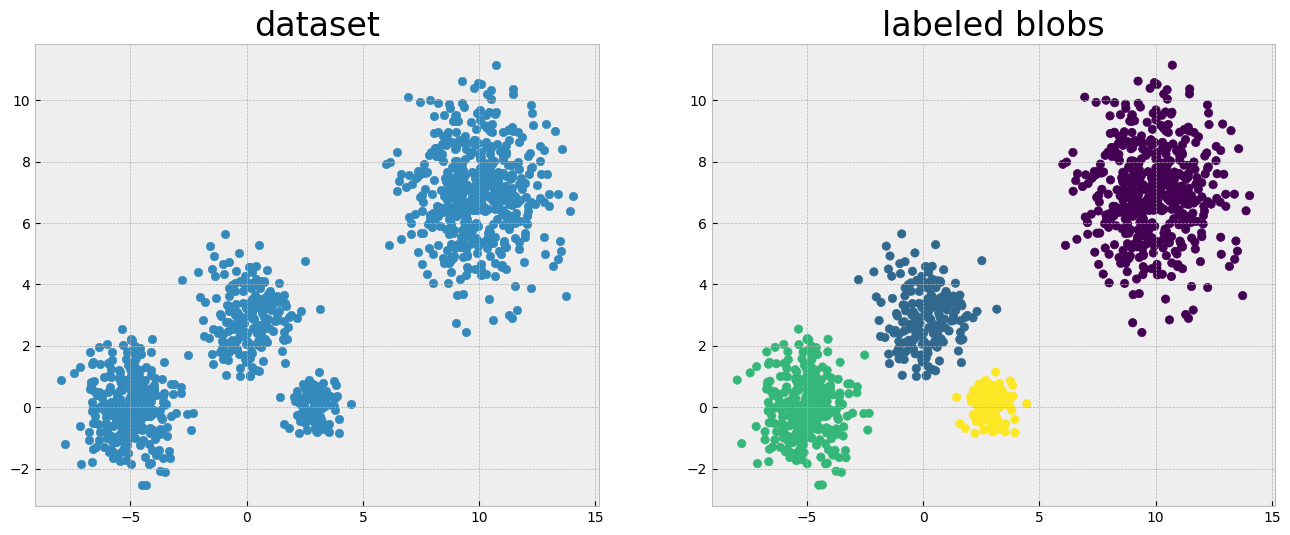

In [2]:
# We set a random_state to generate always the same Gaussian sampling.
random_state = 0
# The make_blobs function requires the centers, standard deviations and number of samples for each Gaussian to sample.
centers = [[10,7],[0,3],[-5,0],[3,0]]
n_samples = [500,200,300,100]
cluster_std=[1.5,1,1,0.5]
     
X_blobs, y_blobs = make_blobs(n_samples=n_samples,
                   random_state=random_state,
                   cluster_std=cluster_std,
                   centers=centers)

fig, axs = plt.subplots(1,2,figsize=[16,6])
axs[0].scatter(X_blobs[:,0],X_blobs[:,1])
axs[0].set_title('dataset', size=title_size)
axs[1].scatter(X_blobs[:,0],X_blobs[:,1],c=y_blobs)
axs[1].set_title('labeled blobs', size=title_size)

plt.show();

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_blobs, y_blobs, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# KNN Classification

In [4]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


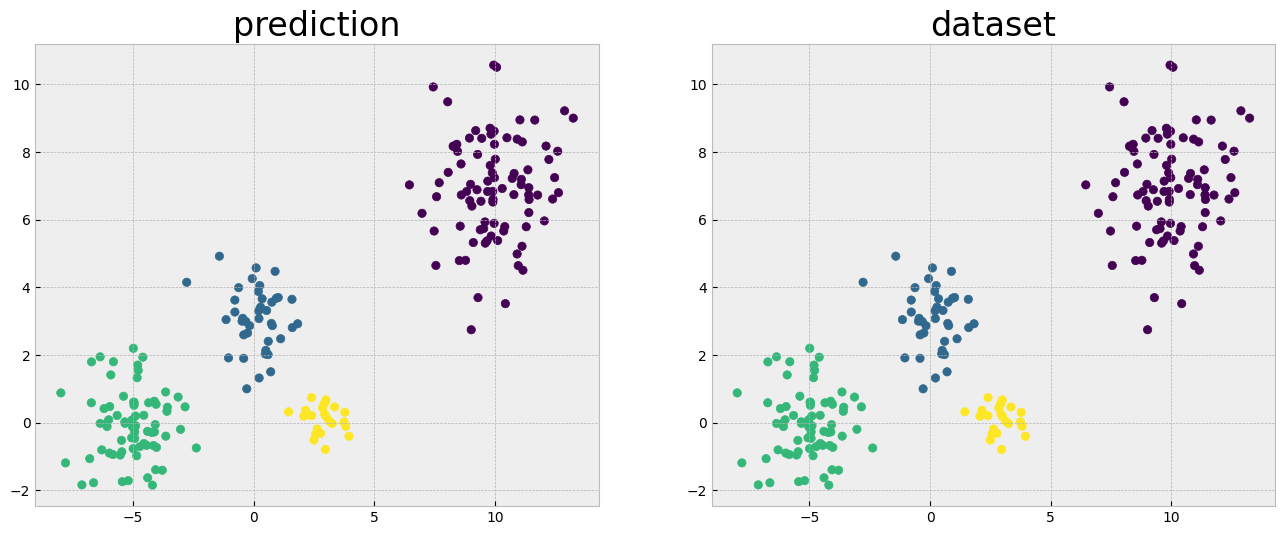

In [5]:
y_val_pred=neigh.predict(X_val)
fig, axs = plt.subplots(1,2,figsize=[16,6])
axs[0].scatter(X_val[:,0],X_val[:,1],c=y_val_pred)
axs[0].set_title('prediction', size=title_size)
axs[1].scatter(X_val[:,0],X_val[:,1],c=y_val)
axs[1].set_title('dataset', size=title_size)

plt.show();

In [6]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


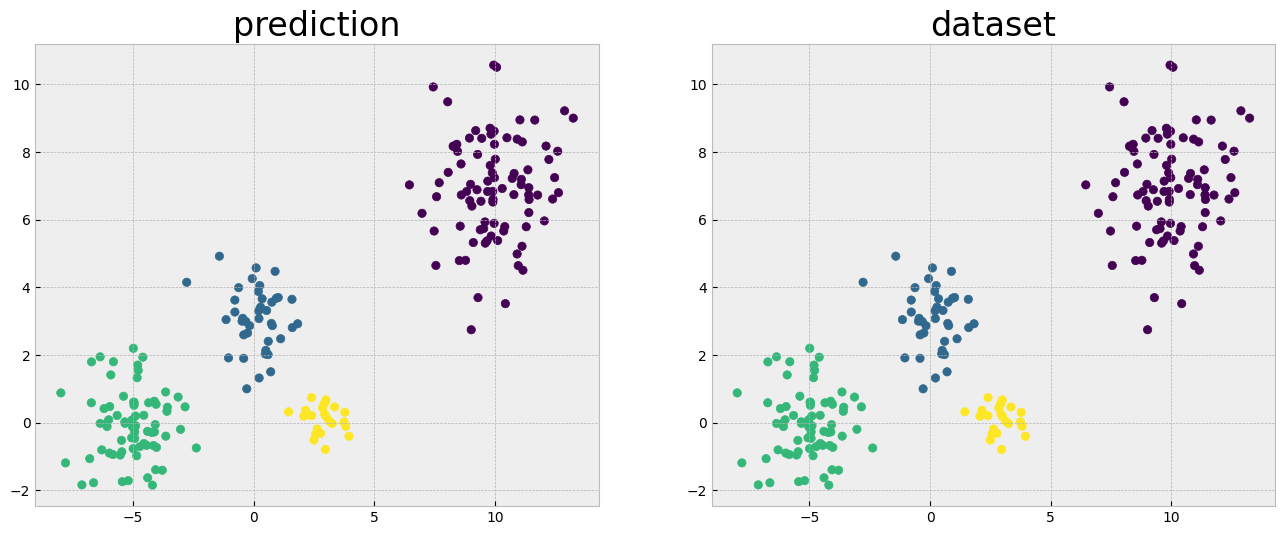

In [7]:
y_val_pred=neigh.predict(X_val)
fig, axs = plt.subplots(1,2,figsize=[16,6])
axs[0].scatter(X_val[:,0],X_val[:,1],c=y_val_pred)
axs[0].set_title('prediction', size=title_size)
axs[1].scatter(X_val[:,0],X_val[:,1],c=y_val)
axs[1].set_title('dataset', size=title_size)

plt.show();

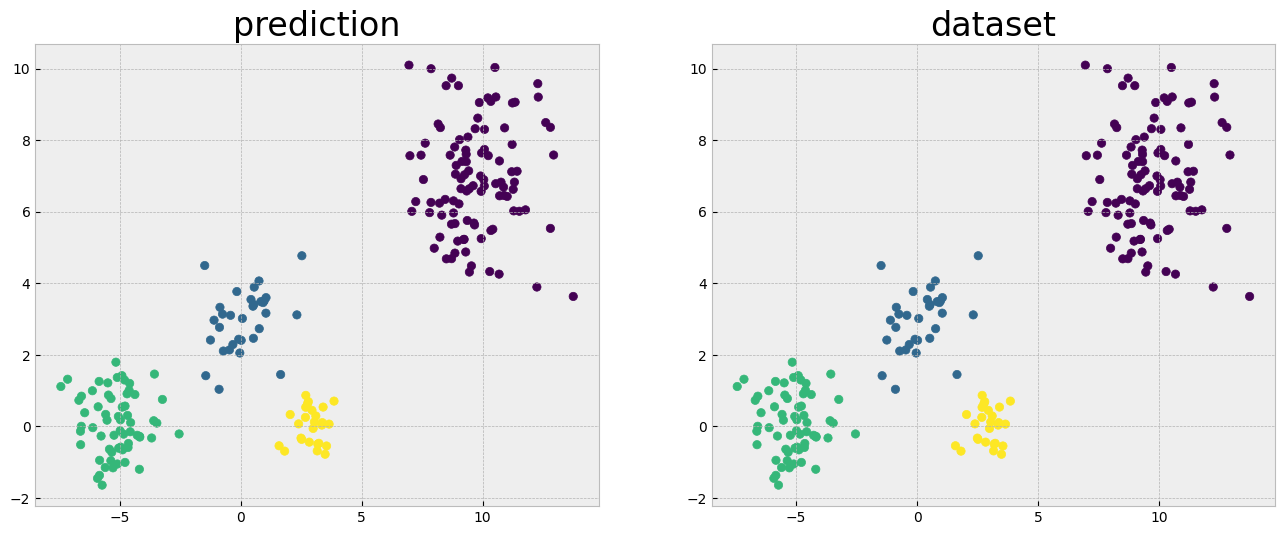

In [8]:
y_test_pred=neigh.predict(X_test)
fig, axs = plt.subplots(1,2,figsize=[16,6])
axs[0].scatter(X_test[:,0],X_test[:,1],c=y_test_pred)
axs[0].set_title('prediction', size=title_size)
axs[1].scatter(X_test[:,0],X_test[:,1],c=y_test)
axs[1].set_title('dataset', size=title_size)

plt.show();

# PCA

In [9]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
df=pd.read_csv(r"C:\Users\ayber\OneDrive\Masaüstü\ML\Data\external\Fatigue_data.csv").copy()

In [12]:
target = df.Fatigue.values

In [13]:
del df['Fatigue']

In [14]:
X = df.values
X.shape

(437, 26)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [16]:
from sklearn.decomposition import PCA 
                                     
pca8 = PCA(n_components=8)    
pca8.fit(X_scaled)                          
print(pca8)                        
X_pca8 = pca8.transform(X_scaled)

# The fit learns some quantities from the data, namely the "components" and "explained variance"

print('components: ' + str(pca8.components_))                 # each component defined by x-y pair
print('explained variance: ' + str(pca8.explained_variance_)) # how much variance each component explains 
                                                              # taking into consideration the entire dataset
print('cummulative explained variance: ' + str(round(sum(pca8.explained_variance_),3)))
print('ratio: ', sum(pca8.explained_variance_ratio_ * 100))

PCA(n_components=8)
components: [[ 1.87102250e-01  2.69632010e-01 -2.80790674e-01 -2.81650783e-01
  -2.02782000e-01  2.94448912e-01  2.75328179e-01  2.94610398e-01
   2.65947182e-01  2.49449661e-01 -2.54205707e-01  2.45817507e-01
  -2.80786035e-01 -2.35310544e-01 -1.33314045e-02 -5.33843045e-02
  -6.06793808e-02 -5.24083073e-03  3.97533204e-02  1.03139476e-01
   8.07772326e-02  1.06391084e-01 -9.19362464e-02 -6.03889955e-02
  -2.90101675e-02 -4.18046863e-02]
 [-2.97476260e-01 -1.23621171e-01 -1.49601952e-01 -1.48304603e-01
   2.80379732e-01  8.07929154e-02  7.58483680e-02  8.15953795e-02
   8.80566697e-02  7.60592503e-02 -1.61976899e-01 -4.32717991e-04
  -1.49289023e-01 -4.33053328e-03 -6.52575273e-02 -4.91475539e-03
   1.97437294e-01  3.62398757e-01 -3.03007905e-01 -3.47049930e-01
  -2.03531599e-01 -1.89332411e-01  1.28369061e-01  3.61237545e-01
   2.56379661e-01 -1.24055972e-01]
 [ 2.06097275e-01 -9.31990657e-02  1.88333072e-02  2.59612066e-02
  -4.14782253e-02  6.71011653e-02  7.933

In [17]:
np.cumsum(pca8.explained_variance_ratio_ * 100)

array([40.84809386, 54.50123953, 60.83532631, 66.53690638, 71.93845268,
       76.58845254, 80.79292931, 84.05241953])

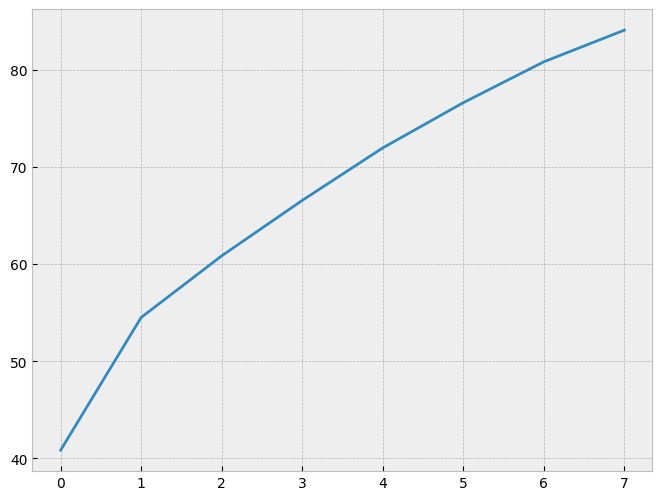

In [18]:
plt.plot(np.cumsum(pca8.explained_variance_ratio_ * 100))

<Axes: >

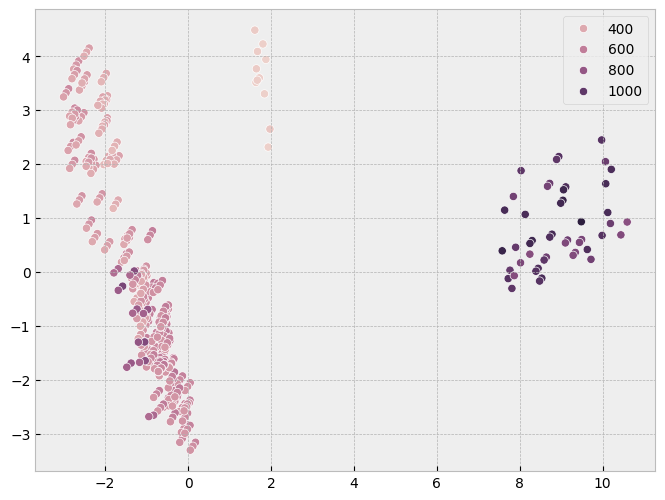

In [19]:
pca2 = PCA(n_components=2)            # applies PCA with a two-component fit
pca2.fit(X_scaled)                           # fits the PCA model with dataset X defined above
X_pca2 = pca2.transform(X_scaled)
sns.scatterplot(x=X_pca2[:,0],y=X_pca2[:,1],hue=target)

In [20]:
print('components: ' + str(pca2.components_))

components: [[ 0.18710225  0.26963201 -0.28079067 -0.28165078 -0.202782    0.29444891
   0.27532818  0.2946104   0.26594718  0.24944966 -0.25420571  0.24581751
  -0.28078604 -0.23531054 -0.0133314  -0.0533843  -0.06067938 -0.00524083
   0.03975332  0.10313948  0.08077723  0.10639108 -0.09193625 -0.060389
  -0.02901017 -0.04180469]
 [-0.29747626 -0.12362117 -0.14960195 -0.1483046   0.28037973  0.08079292
   0.07584837  0.08159538  0.08805667  0.07605925 -0.1619769  -0.00043272
  -0.14928902 -0.00433053 -0.06525753 -0.00491476  0.19743729  0.36239876
  -0.30300791 -0.34704993 -0.2035316  -0.18933241  0.12836906  0.36123755
   0.25637966 -0.12405597]]
